In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [2]:
measures_CCCSL  = mc.COVID19_measures(datasource = 'CSH',     download_data = True)
measures_Oxford = mc.COVID19_measures(datasource = 'Oxford',  download_data = True)
measures_ACAPS  = mc.COVID19_measures(datasource = 'ACAPS',   download_data = True)
measures_WHO    = mc.COVID19_measures(datasource = 'WHOPHSM', download_data = True)


/usr/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


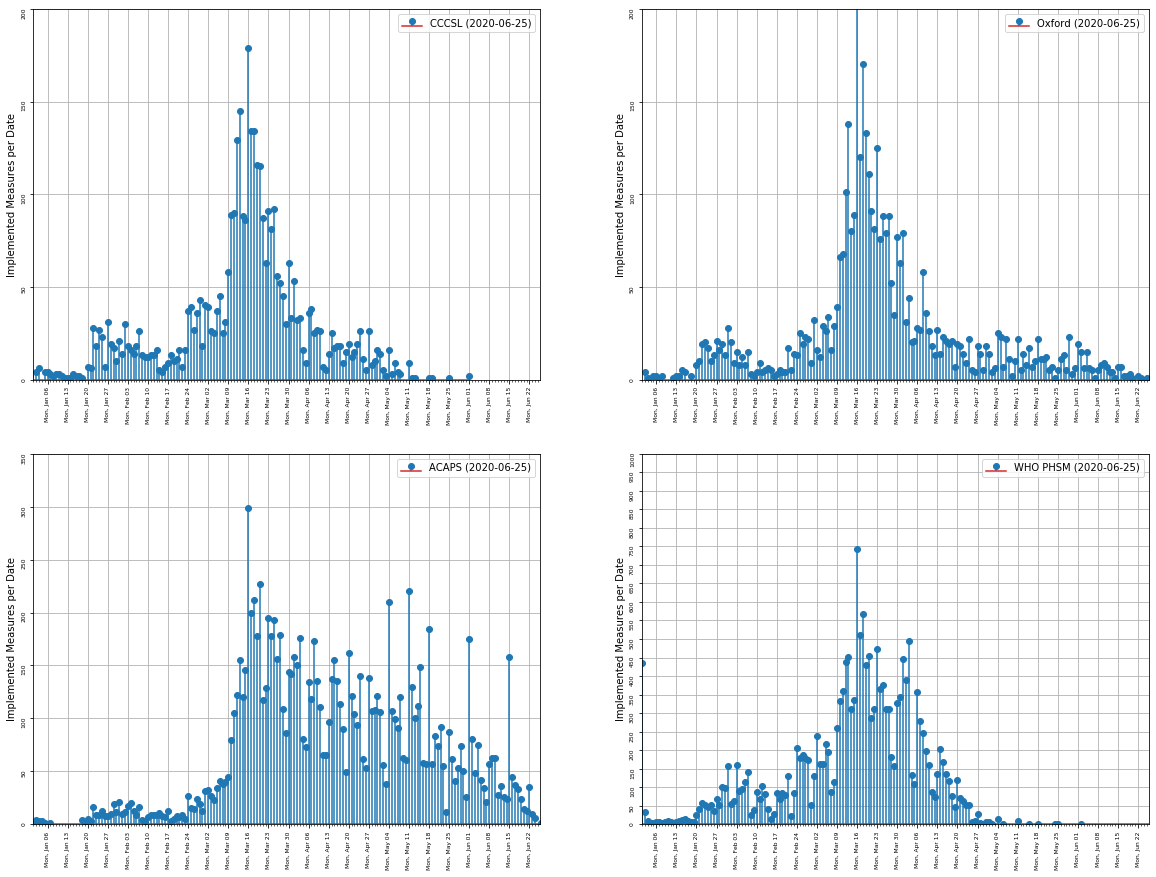

In [3]:
def MeasureFraction(df,date):
    return df[df['Date'] <= datetime.datetime.strptime(date,'%d/%m/%Y')]['count'].sum()/df['count'].sum()

d = datetime.timedelta(days = 1)

fig,axes = plt.subplots(2,2,figsize = (20,15))            
ax = axes.flatten()

days     = mdates.DayLocator()
weeks    = mdates.WeekdayLocator(byweekday = mdates.MO)
date_fmt = mdates.DateFormatter('%a, %b %d')

    
vertlines = ['19/3/2020','31/3/2020','6/4/2020']



measuredates_CCCSL = {}
for country, measures in measures_CCCSL:
    for mn,dates in measures.items():
        for date in dates:
            date_dt = datetime.datetime.strptime(date,'%d/%m/%Y')
            if not date_dt in measuredates_CCCSL.keys():
                measuredates_CCCSL[date_dt] = 0
            measuredates_CCCSL[date_dt] += 1

df_CCCSL = pd.DataFrame({'Date':list(measuredates_CCCSL.keys()),'count':list(measuredates_CCCSL.values())})
ax[0].stem(df_CCCSL['Date'].values,df_CCCSL['count'].values, label ='CCCSL ({:s})'.format(datetime.datetime.today().strftime('%Y-%m-%d')),use_line_collection=True)
ax[0].set_ylim([0,200])



measuredates_Oxford = {}
for country, measures in measures_Oxford:
    for mn,dates in measures.items():
        for date in dates:
            date_dt = datetime.datetime.strptime(date,'%d/%m/%Y')
            if not date_dt in measuredates_Oxford.keys():
                measuredates_Oxford[date_dt] = 0
            measuredates_Oxford[date_dt] += 1

df_Oxford = pd.DataFrame({'Date':list(measuredates_Oxford.keys()),'count':list(measuredates_Oxford.values())})
ax[1].stem(df_Oxford['Date'].values,df_Oxford['count'].values, label ='Oxford ({:s})'.format(datetime.datetime.today().strftime('%Y-%m-%d')),use_line_collection=True)
ax[1].set_ylim([0,200])


    
measuredates_ACAPS = {}
for country, measures in measures_ACAPS:
    for mn,dates in measures.items():
        for date in dates:
            date_dt = datetime.datetime.strptime(date,'%d/%m/%Y')
            if not date_dt in measuredates_ACAPS.keys():
                measuredates_ACAPS[date_dt] = 0
            measuredates_ACAPS[date_dt] += 1

df_ACAPS = pd.DataFrame({'Date':list(measuredates_ACAPS.keys()),'count':list(measuredates_ACAPS.values())})
ax[2].stem(df_ACAPS['Date'].values,df_ACAPS['count'].values, label ='ACAPS ({:s})'.format(datetime.datetime.today().strftime('%Y-%m-%d')),use_line_collection=True)
ax[2].set_ylim([0,350])

    
    
measuredates_WHO = {}
for country, measures in measures_WHO:
    for mn,dates in measures.items():
        for date in dates:
            date_dt = datetime.datetime.strptime(date,'%d/%m/%Y')
            if not date_dt in measuredates_WHO.keys():
                measuredates_WHO[date_dt] = 0
            measuredates_WHO[date_dt] += 1

df_WHO = pd.DataFrame({'Date':list(measuredates_WHO.keys()),'count':list(measuredates_WHO.values())})
ax[3].stem(df_WHO['Date'].values,df_WHO['count'].values, label ='WHO PHSM ({:s})'.format(datetime.datetime.today().strftime('%Y-%m-%d')),use_line_collection=True)
ax[3].set_ylim([0,1000])



for i in range(4):
    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_major_formatter(date_fmt)
    ax[i].xaxis.set_minor_locator(days)
    ax[i].format_xdata = mdates.DateFormatter('%y %m %d')
    ax[i].tick_params(labelrotation=90, labelsize=6)
    ax[i].set_ylabel('Implemented Measures per Date')
    ax[i].grid()
    ax[i].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))
    ax[i].legend()
    ax[i].set_xlim([datetime.datetime.strptime('1/1/2020','%d/%m/%Y'),datetime.datetime.today()])



fig.savefig('implemented_measure_count.pdf')


